Hopf bifurcation normal form:

$$ \dot{z} = z\left((\lambda + \mathrm{i}) + b |z|^2 \right) $$

In [1]:
import numpy as np
import scipy.integrate
import scipy.signal
import matplotlib.pyplot as plt

In [149]:
# l = 0.1
l = 1.5930192155536904
# b = -0.1 + 0.1j
b = -0.1-0.04736619625732066j

In [150]:
def deriv( t, z ):
    return z * ( ( l + 1.j ) + b * z * np.conj( z ) )

In [151]:
t_span = [0, 1e2]
t_eval = np.arange( t_span[0], t_span[-1], 5e-2 )

In [152]:
z0 = np.array( [0.1 + 0.j] )

In [153]:
sol = scipy.integrate.solve_ivp( deriv, t_span, z0,
                                 t_eval = t_eval )

In [154]:
t_star = sol.t
z_star = sol.y

(0, 100)

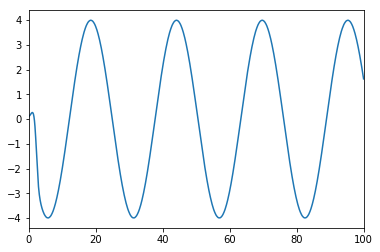

In [155]:
plt.plot( t_star, np.real( z_star.T ) )
plt.xlim( 0, 100 )

## Many
Add more with **real coupling**:

$$ \dot{z_i} = z_i \left((\lambda + \mathrm{i}) + b |z_i|^2 \right) + \sum_k W_{ik} \mathrm{Re}(z_k) $$

In [178]:
Nz = 20

l = np.random.randn( Nz )
b = -0.1 + np.random.randn( Nz ) * 1.j

W = np.random.randn( Nz, Nz )

In [179]:
def deriv( t, z ):
    
    z_dot = np.zeros( z.shape[0], dtype = np.complex )
    
    for i in range( z_dot.shape[0] ):
        z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )
        
        for k in range( z_dot.shape[0] ):
            z_dot[i] += W[i, k] * np.real( z[k] )
    
    return z_dot

In [180]:
t_span = [0, 1e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

In [181]:
# z0 = np.random.randn( Nz )
z0 = np.zeros( (Nz,), dtype = np.complex )
for i in range( z0.shape[0] ):
    z0[i] = 0.1 + 0.j

In [ ]:
sol = scipy.integrate.solve_ivp( deriv, t_span, z0,
                                 t_eval = t_eval )

In [ ]:
t_star = sol.t
z_star = sol.y

In [ ]:
plt.figure( figsize = (24, 6) )
plt.imshow( np.real( z_star ), aspect = 'auto' )

In [ ]:
plt.figure( figsize = (24, 6) )
plt.plot( t_star, z_star[8, :] )
plt.xlim( 20, 40 )
# plt.ylim( -0.001, 0.001 )

In [ ]:
C = np.corrcoef( np.real( z_star ) )
plt.imshow( C )
plt.clim( -1, 1 )

In [ ]:
corr_win = 400
corr_win_skip = 20

i = 0
j = 1

start_idxs = np.arange( 0, z_star.shape[1] - corr_win, corr_win_skip )
win_corrs = np.zeros( (start_idxs.shape[0],) )

for i_win, start_idx in enumerate( start_idxs ):
    end_idx = start_idx + corr_win
    cur_z = z_star[:, start_idx:end_idx]
    cur_corr = np.corrcoef( np.real( cur_z[i, :] ), np.real( cur_z[j, :] ) )
    win_corrs[i_win] = cur_corr[0, 1]

In [ ]:
plt.figure( figsize = (12, 6) )
plt.plot( t_star[start_idxs], win_corrs )
plt.xlim( 0, 1000 )
plt.show()

In [150]:
corr_win = 100
corr_win_skip = 10

start_idxs = np.arange( 0, z_star.shape[1] - corr_win, corr_win_skip )
win_corrs = np.zeros( (Nz, Nz, start_idxs.shape[0],) )

for i in range( Nz ):
    for j in range( i+1, Nz ):
        
        for i_win, start_idx in enumerate( start_idxs ):
            end_idx = start_idx + corr_win
            cur_z = z_star[:, start_idx:end_idx]
            cur_corr = np.corrcoef( np.real( cur_z[i, :] ), np.real( cur_z[j, :] ) )
            win_corrs[i, j, i_win] = cur_corr[0, 1]

In [151]:
win_corr_vars = np.var( win_corrs, axis = 2 )

0.20645722533521618


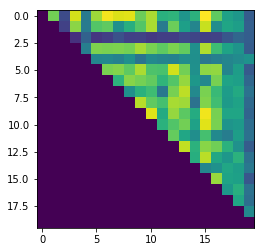

In [154]:
plt.imshow( win_corr_vars )
plt.colorbar()

vals = []
for i in range( win_corr_vars.shape[0] ):
    for j in range( i+1, win_corr_vars.shape[1] ):
        vals.append( win_corr_vars[i,j] )
vals = np.array( vals )

print( np.median( np.abs( vals ) ) )

## Many with weight dynamics

Let's take the real coupling from before and add the baseline weight dynamics of the previous notebooks:

$$
\begin{eqnarray*}
    \dot{z_i} & = & z_i \left((\lambda + \mathrm{i}) + b |z_i|^2 \right) + \sum_k W_{ik} \mathrm{Re}(z_k) \\
    \dot{W} & = & \alpha \left( I_{N_z} - \mathbf{z}\mathbf{z}^\top \right)
\end{eqnarray*}
$$

In [155]:
Nz = 20

# Hopf oscillator characteristics
l = np.random.randn( Nz )
# TODO Should the Lyopunov exponent vary across oscillators?
b = -0.1 + np.random.randn( Nz ) * 1.j

alpha = 0.1

In [156]:
def deriv( t, y ):
    
    z = y[:Nz]
    W = np.reshape( y[Nz:], (Nz, Nz) )
    
    z_dot = np.zeros( z.shape[0], dtype = np.complex )
    
    for i in range( z_dot.shape[0] ):
        z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )
        
        for k in range( z_dot.shape[0] ):
            z_dot[i] += W[i, k] * np.real( z[k] )
    
    W_dot = alpha * ( np.eye( Nz ) - np.outer( np.real( z ), np.real( z ) ) )
    
    y_dot = np.zeros( y.shape[0], dtype = np.complex )
    y_dot[:Nz] = z_dot
    y_dot[Nz:] = W_dot.flatten()
    
    return y_dot

In [157]:
t_span = [0, 1e3]
t_eval = np.arange( t_span[0], t_span[-1], 5e-2 )

In [158]:
# TODO Randomize the z0 in an intelligent way
z0 = np.zeros( (Nz,), dtype = np.complex )
for i in range( z0.shape[0] ):
    z0[i] = 0.01 + 0.j
    
W0 = np.random.randn( Nz, Nz )

In [159]:
y0 = np.zeros( (Nz + Nz*Nz,), dtype = np.complex )
y0[:Nz] = z0
y0[Nz:] = W0.flatten()

In [160]:
sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval )

In [161]:
t_star = sol.t
y_star = sol.y

z_star = y_star[:Nz, :]
W_star = np.reshape( y_star[Nz:, :], (Nz, Nz, y_star.shape[1]) )

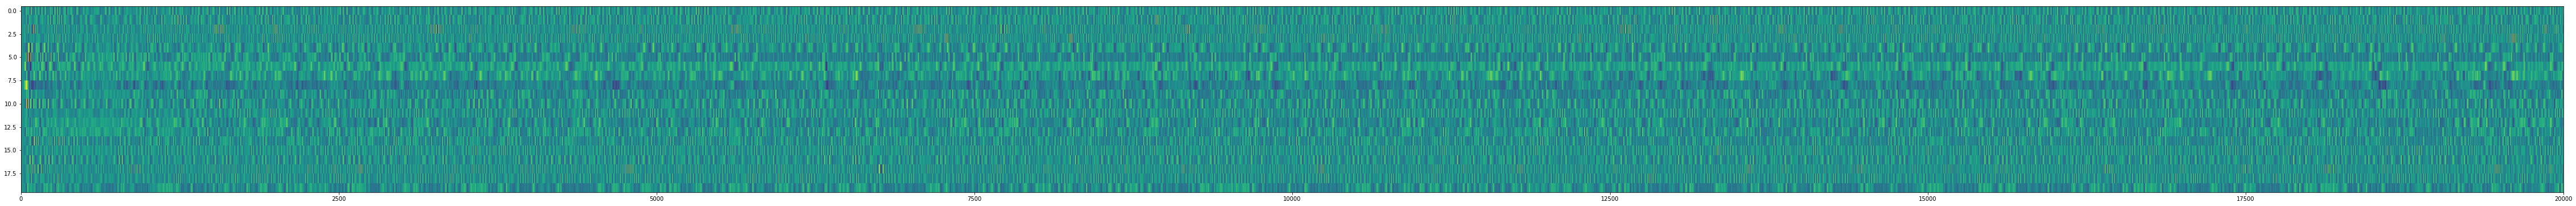

In [162]:
plt.figure( figsize = (80, 6) )
plt.imshow( np.real( z_star ), aspect = 'auto' )

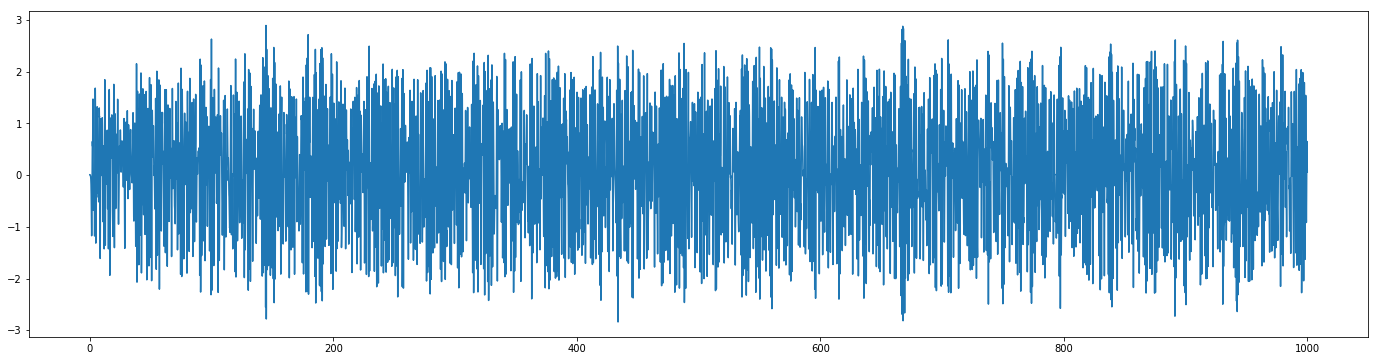

In [163]:
plt.figure( figsize = (24, 6) )
plt.plot( t_star, np.real( z_star[15, :] ) )
# plt.xlim( 0, 2500 )
# plt.ylim( -0.001, 0.001 )

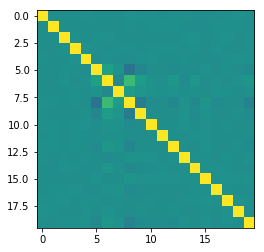

In [164]:
Czz = np.corrcoef( np.real( z_star ) )
plt.imshow( Czz )
plt.clim( -1, 1 )

In [165]:
corrs = []
for i in range( Czz.shape[0] ):
    for j in range( i+1, Czz.shape[1] ):
        corrs.append( Czz[i,j] )
corrs = np.array( corrs )

print( np.median( np.abs( corrs ) ) )

0.007908372295836595


### Correlation in small windows

In [175]:
corr_win = 400
corr_win_skip = 20

i = 0
j = 2

start_idxs = np.arange( 0, z_star.shape[1] - corr_win, corr_win_skip )
win_corrs = np.zeros( (start_idxs.shape[0],) )

for i_win, start_idx in enumerate( start_idxs ):
    end_idx = start_idx + corr_win
    cur_z = z_star[:, start_idx:end_idx]
    cur_corr = np.corrcoef( np.real( cur_z[i, :] ), np.real( cur_z[j, :] ) )
    win_corrs[i_win] = cur_corr[0, 1]

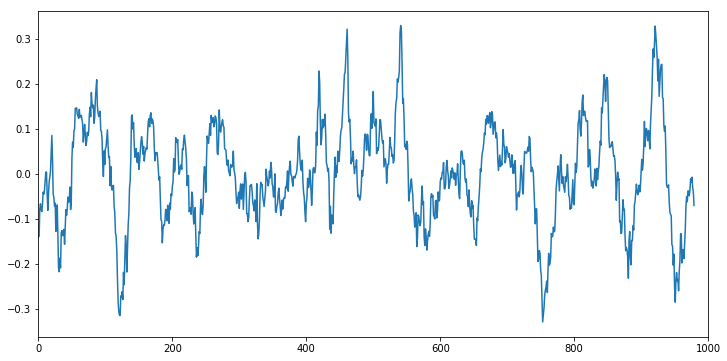

In [177]:
plt.figure( figsize = (12, 6) )
plt.plot( t_star[start_idxs], win_corrs )
plt.xlim( 0, 1000 )
plt.show()

In [168]:
def autocorr(x):
    result = np.correlate( x, x, mode = 'full' )
    return result[result.size//2:]

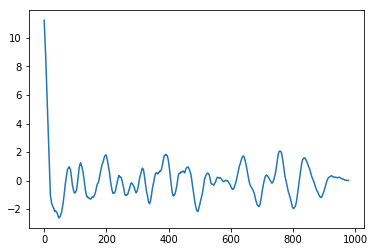

In [169]:
corr_autocorr = autocorr( win_corrs )
plt.plot( corr_autocorr )
# plt.ylim( -50, 50 )
# plt.xlim( 0, 250 )

In [170]:
corr_win = 100
corr_win_skip = 10

start_idxs = np.arange( 0, z_star.shape[1] - corr_win, corr_win_skip )
win_corrs = np.zeros( (Nz, Nz, start_idxs.shape[0],) )

for i in range( Nz ):
    for j in range( i+1, Nz ):
        
        for i_win, start_idx in enumerate( start_idxs ):
            end_idx = start_idx + corr_win
            cur_z = z_star[:, start_idx:end_idx]
            cur_corr = np.corrcoef( np.real( cur_z[i, :] ), np.real( cur_z[j, :] ) )
            win_corrs[i, j, i_win] = cur_corr[0, 1]

In [172]:
win_corr_vars = np.var( win_corrs, axis = 2 )

0.06374913882388306


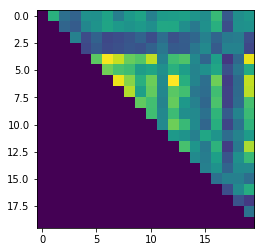

In [173]:
plt.imshow( win_corr_vars )

vals = []
for i in range( win_corr_vars.shape[0] ):
    for j in range( i+1, win_corr_vars.shape[1] ):
        vals.append( win_corr_vars[i,j] )
vals = np.array( vals )

print( np.median( np.abs( vals ) ) )

### Coherence

In [15]:
import scipy.signal

In [16]:
print( 'foo' )

foo


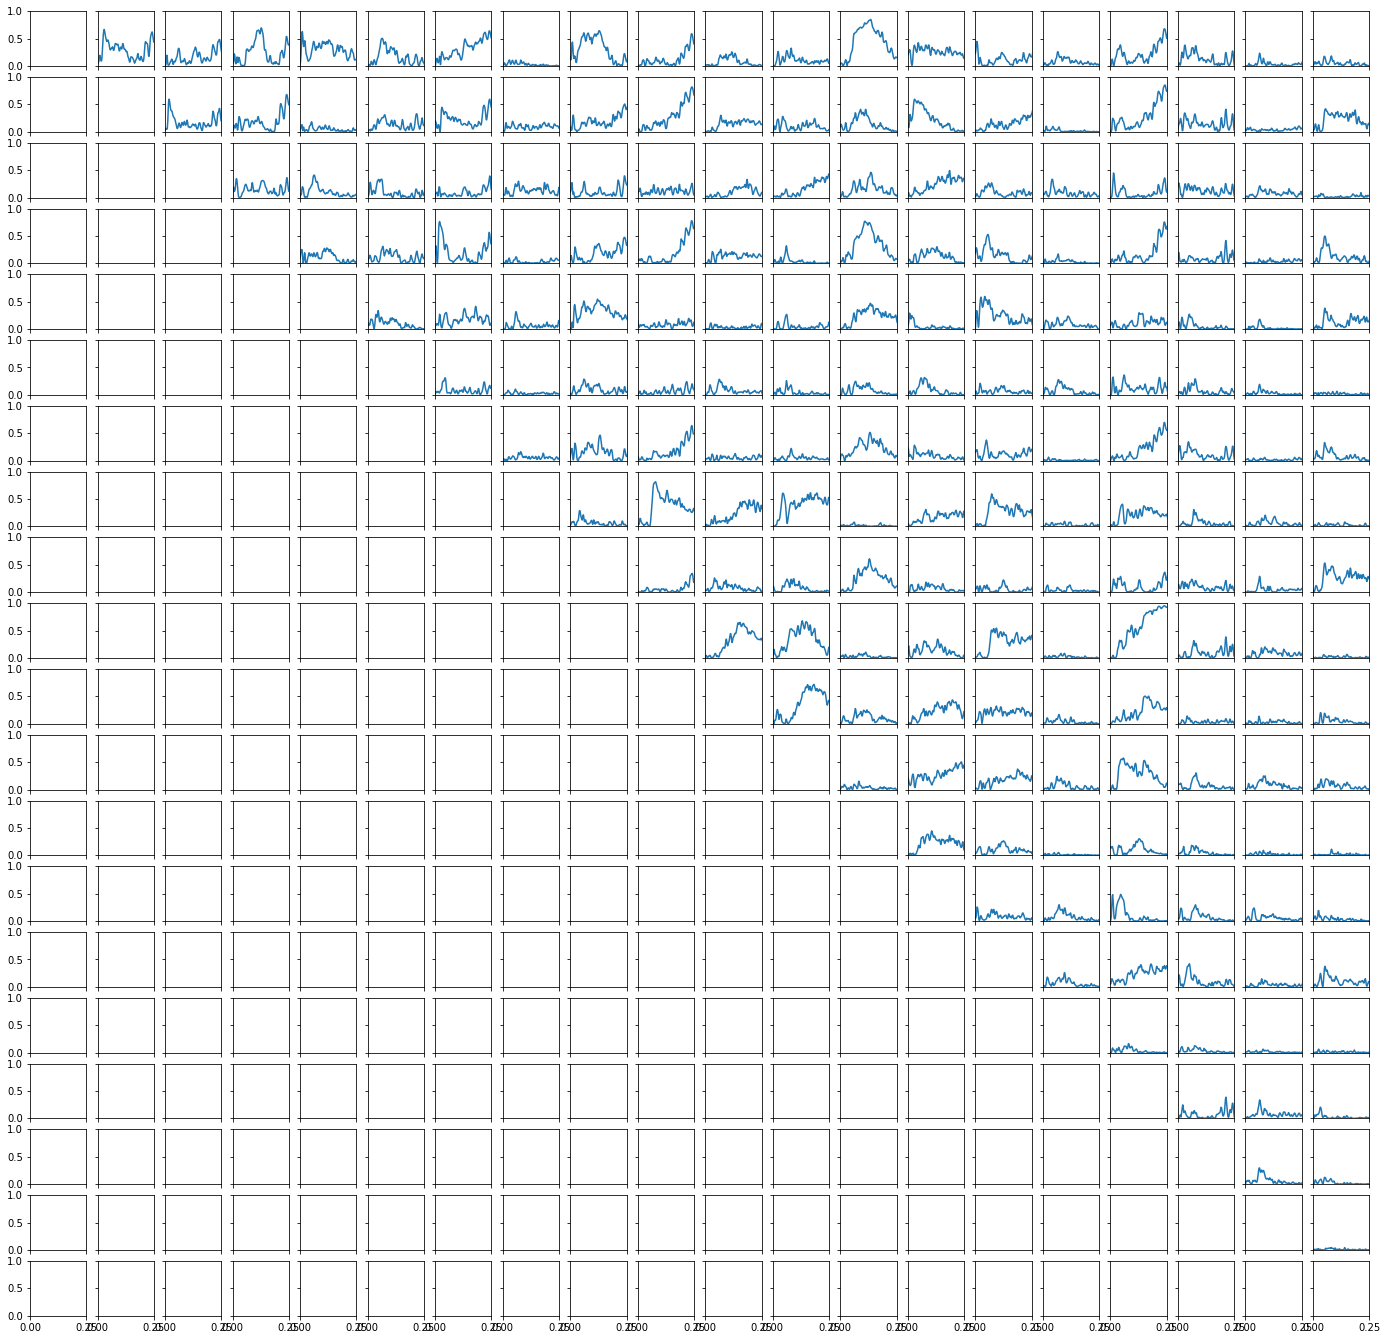

In [18]:
fig, axs = plt.subplots( Nz, Nz, figsize = (24, 24),
                         sharex = True,
                         sharey = True )

for i in range( Nz ):
    for j in range( i+1, Nz ):
        f, Cxy = scipy.signal.coherence( np.real( z_star[i, :] ), np.real( z_star[j, :] ), nfft = 512 )

        axs[i, j].plot( f, Cxy )
        axs[i, j].set_ylim( 0, 1 )
        axs[i, j].set_xlim( 0, 0.25 )
        
plt.show()